In [35]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plot

import numpy as np
from sklearn.cluster import KMeans
import json

data = json.load(open('citypopulation.json'))
dataframe = json_normalize(data)
#print(dataframe)

le = LabelEncoder()
dataframe['cityLabel'] = le.fit_transform(dataframe['cityLabel'])
dataframe = dataframe.astype(dtype= {"year":"<i4", "cityLabel":"<U200", "population":"i"})
dataframe = dataframe.loc[dataframe['year'] > 1500]
#dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[['year', 'population']]


clusters = KMeans(n_clusters = 2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])
   

plot.rcParams['figure.figsize'] = [10, 10]
plot.scatter(yearPopulation['year'], yearPopulation['population'], c=colors[clusters.labels_])
plot.show()

In [36]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import tree

import numpy as np
from sklearn.cluster import KMeans
import json

data = json.load(open('citypopulation.json'))
dataframe = json_normalize(data)
#print(dataframe)

le = LabelEncoder()
dataframe['cityLabel'] = le.fit_transform(dataframe['cityLabel'])
dataframe = dataframe.astype(dtype= {"year":"<i4", "cityLabel":"<U200", "population":"i"})
dataframe = dataframe.loc[dataframe['year'] > 1500]
dataframe['populated'] = dataframe.apply(lambda row: row.population >700000, axis=1)
#print(dataframe)
#dataframe = dataframe.loc[dataframe['population'] < 700000]
#yearPopulation = dataframe[['year', 'population']]


decisionTreeClass = tree.DecisionTreeClassifier()

decisionTreeClass.fit(dataframe[['year', 'population']], dataframe['populated'])
decisionTreeClass.predict([[1400, 900000]])


array([ True])

In [37]:
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import tree
import graphviz

import numpy as np
from sklearn.cluster import KMeans
import json

data = json.load(open('citypopulation.json'))
dataframe = json_normalize(data)
#print(dataframe)

le = LabelEncoder()
dataframe['cityLabel'] = le.fit_transform(dataframe['cityLabel'])
dataframe = dataframe.astype(dtype= {"year":"<i4", "cityLabel":"<U200", "population":"i"})
dataframe = dataframe.loc[dataframe['year'] > 1500]
dataframe['populated'] = dataframe.apply(lambda row: row.population >700000, axis=1)
#print(dataframe)
#dataframe = dataframe.loc[dataframe['population'] < 700000]
#yearPopulation = dataframe[['year', 'population']]


decisionTreeClass = tree.DecisionTreeRegressor()

decisionTreeClass.fit(dataframe[['year']], dataframe['population'])

#dot_data = tree.export_graphviz(decisionTreeClass, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("citypopulation") 
decisionTreeClass.predict([[1400, 900000]])


ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 2 

In [65]:
from sklearn import tree
data = [[0, 0], 
        [1, 1],
        [1, 0]]
result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)
dtc.predict([[1, 1]])

array([0])

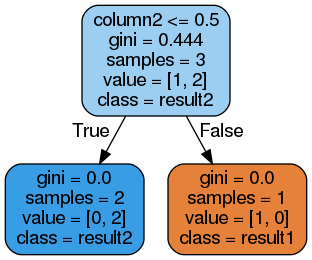

In [3]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image, display

data = [[0, 0], 
        [1, 1],
        [1, 0]]
result = [1, 0, 1]
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, result)
dtc.predict([[1, 1]])

dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=['column1', 'column2'],
                                filled=True, rounded=True, 
                                class_names = ['result1', 'result2']
                                ) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [1]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

#prediction
prediction = dtc.predict([
    [le1.transform(['red'])[0], le2.transform(['nature'])[0],
     le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)


['Favorite']
[0.         0.7787234  0.08297872 0.13829787]


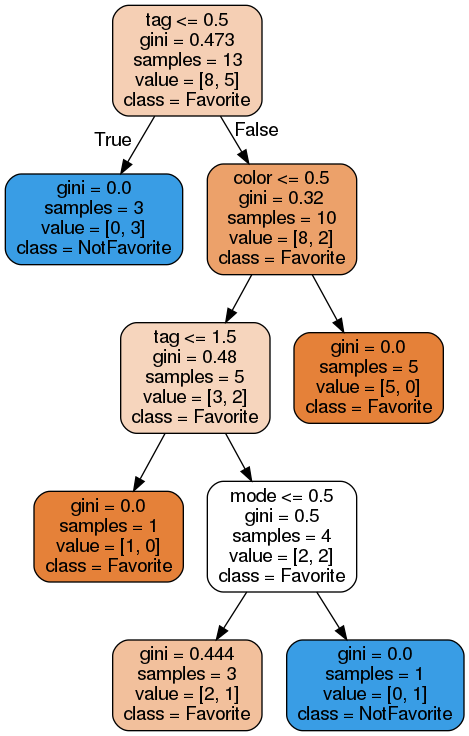

In [6]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=dataframe.columns,
                                filled=True, rounded=True, 
                                class_names = le5.inverse_transform(resultframe.favorite.unique())
                                ) 
graph = graphviz.Source(dot_data) 
 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [38]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=dataframe.columns,
                                filled=True, rounded=True, 
                                class_names = le5.inverse_transform(resultframe.favorite.unique())
                                ) 
graph = graphviz.Source(dot_data) 
graph.render("favoriteimages") 

'favoriteimages.pdf'

In [39]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

#prediction
prediction = rfc.predict([
    [le1.transform(['red'])[0], le2.transform(['nature'])[0],
     le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))

['Favorite']


In [1]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
                             random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

#prediction
prediction = rfc.predict([
    [le1.transform(['red'])[0], le2.transform(['nature'])[0],
     le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)

['Favorite']
[0.28475872 0.54335851 0.10117429 0.07070848]


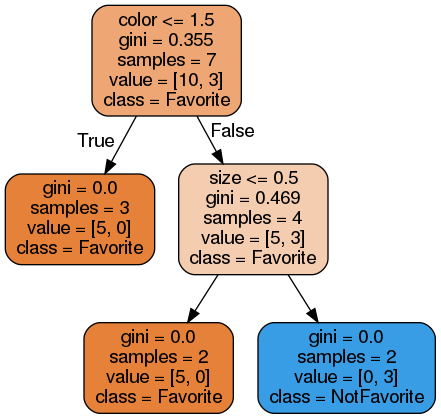

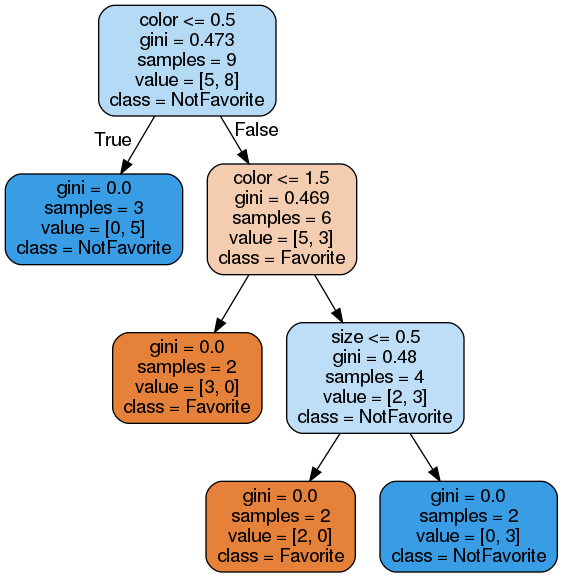

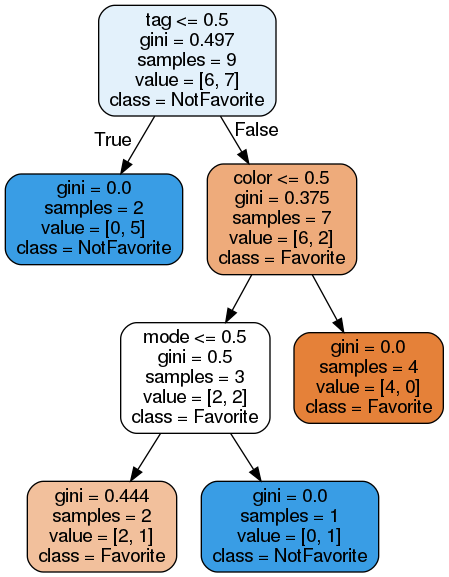

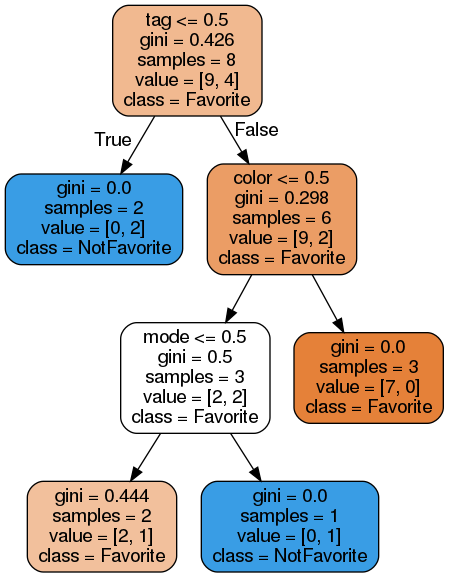

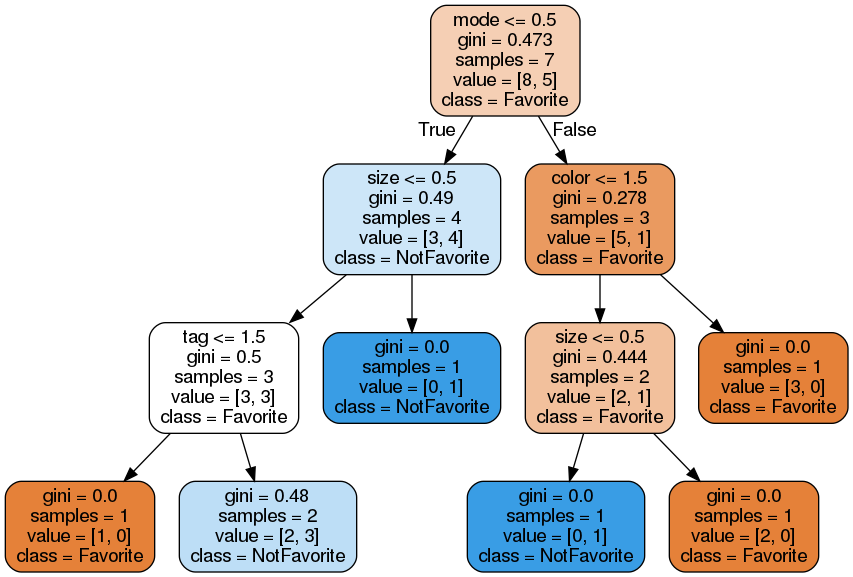

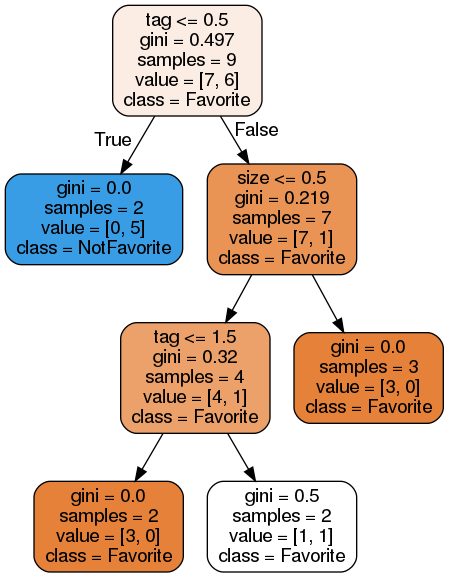

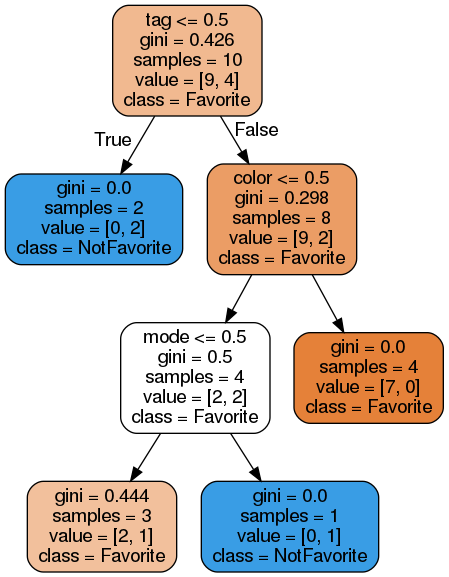

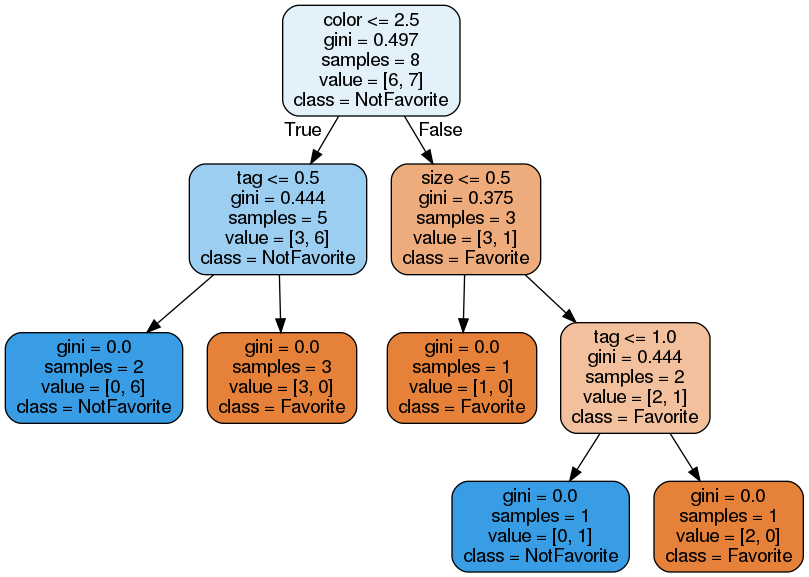

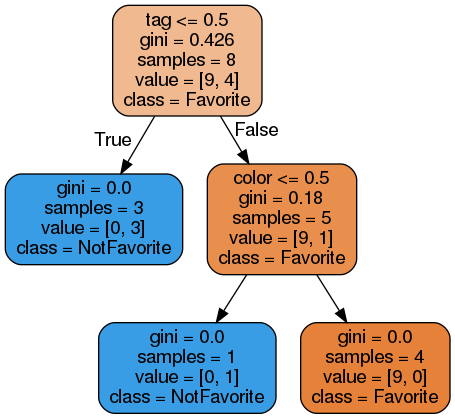

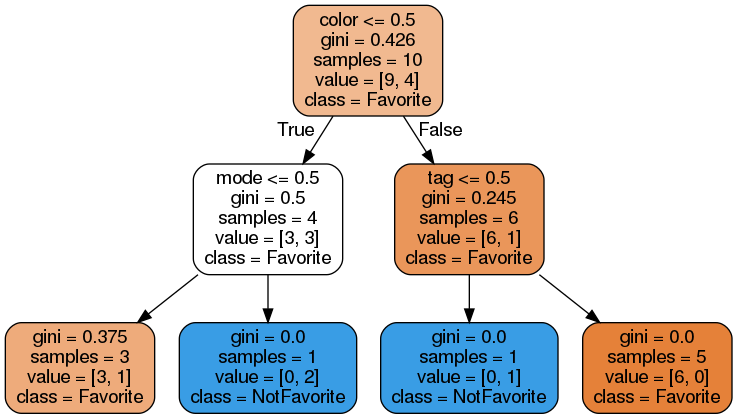

In [1]:
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

data = [
        ['green', 'nature', 'thumbnail', 'landscape'], 
        ['blue', 'architecture', 'medium', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['yellow', 'nature', 'medium', 'portrait'],
        ['green', 'nature', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'landscape'],
        ['blue', 'nature', 'thumbnail', 'portrait'],
        ['yellow', 'architecture', 'thumbnail', 'landscape'],
        ['blue', 'people', 'medium', 'portrait'],
        ['yellow', 'nature', 'medium', 'landscape'],
        ['yellow', 'people', 'thumbnail', 'portrait'],
        ['blue', 'people', 'medium', 'landscape'],
        ['red', 'architecture', 'thumbnail','landscape']]
result = [
          'Favorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite',
          'Favorite',
          'Favorite',
          'NotFavorite',
          'NotFavorite'
          ]


#creating dataframes
dataframe = pd.DataFrame(data, columns=['color', 'tag', 'size', 'mode'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
rfc = RandomForestClassifier(n_estimators=10, max_depth=3,
                             random_state=0,)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

for i in range(10):
    dot_data = tree.export_graphviz(rfc.estimators_[i], out_file=None,
                                feature_names=dataframe.columns,
                                filled=True, rounded=True,
                                class_names = le5.inverse_transform(resultframe.favorite.unique())
                               ) 
    graph = graphviz.Source(dot_data) 
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    img = Image(pydot_graph.create_png())
    display(img)